<font color='red'>The data is available as two attached CSV files:<br>
<b>takehome_user_engagement. csv<br>
    takehome_users . csv </b><br>
    
The data has the following two tables:
1] <b>A user table</b> ( "takehome_users" ) with data on 12,000 users who signed up for the
product in the last two years. This table includes:
● name: the user's name <br>
● object_id: the user's id <br>
● email: email address <br>
● creation_source: how their account was created. This takes on one
of 5 values:<br>
    ○ PERSONAL_PROJECTS: invited to join another user's
personal workspace<br>
    ○ GUEST_INVITE: invited to an organization as a guest
(limited permissions)<br>
    ○ ORG_INVITE: invited to an organization (as a full member)<br>
    ○ SIGNUP: signed up via the website<br>
    ○ SIGNUP_GOOGLE_AUTH: signed up using Google Authentication (using a Google email account for their login
id) <br>
● creation_time: when they created their account<br>
● last_session_creation_time: unix timestamp of last login<br>
● opted_in_to_mailing_list: whether they have opted into receiving
marketing emails <br>
● enabled_for_marketing_drip: whether they are on the regular
marketing email drip <br>
● org_id: the organization (group of users) they belong to<br>
● invited_by_user_id: which user invited them to join (if applicable).<br>
<br>
2]<b> A usage summary table</b> ( "takehome_user_engagement" ) that has a row for each day
that a user logged into the product.<br><br><br>
Defining an "adopted user" as a user who has logged into the product on three separate
days in at least one sevenday period , identify which factors predict future user
adoption . <br>
We suggest spending 1-2
hours on this, but you're welcome to spend more or less.
Please send us a brief writeup of your findings (the more concise, the better no
more
than one page), along with any summary tables, graphs, code, or queries that can help
us understand your approach. Please note any factors you considered or investigation
you did, even if they did not pan out. Feel free to identify any further research or data
you think would be valuable.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
engagement = pd.read_csv('takehome_user_engagement.csv')
users = pd.read_csv('takehome_users.csv',encoding='latin-1') 

In [3]:
engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [4]:
engagement['visited'].value_counts()

1    207917
Name: visited, dtype: int64

In [5]:
engagement.isna().sum()

time_stamp    0
user_id       0
visited       0
dtype: int64

In [6]:
#Engagement drop visited column. It is 1 for all values
engagement.drop('visited', axis=1, inplace=True)

In [7]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [8]:
users.rename(columns = {"object_id":"user_id"}, inplace = True)

In [9]:
users.isna().sum()

user_id                          0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time    3177
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            5583
dtype: int64

In [10]:
len(users), len(engagement)

(12000, 207917)

<font color='green'>We just can not ignore/delete the rows with null values because they contribute to more than 25% of the data. 5583 people do not have invited_by_user_id. Since there is no user_id = 0, let us set all null values to 0, and then create a new column that holds a boolean value 0 if theywere not invited by anyone, 1 if they were invited by anyone.

In [11]:
users.invited_by_user_id.fillna(0, inplace = True)

In [12]:
users["invited_by_user"] = users.invited_by_user_id.apply(lambda i_uid: 0 if i_uid == 0 else 1)

In [13]:
users

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,invited_by_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,1
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,1
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,1
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,1
...,...,...,...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0,0,89,8263.0,1
11996,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,0.0,0
11997,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,8074.0,1
11998,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1.338638e+09,0,0,6,0.0,0


<font color='green'>Lets identify all rows that have null values for last_session_creation_time in engagement and look at the corresponding activity in engagement. 

In [14]:
last_session =engagement.sort_values('time_stamp', ascending = False).drop_duplicates('user_id')

dummy = users.merge(last_session, on=["user_id"], how="left")
dummy.isna().sum()

user_id                          0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time    3177
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id               0
invited_by_user                  0
time_stamp                    3177
dtype: int64

<font color='green'>Time_stamp and last_session_creation_time have same Nans.  Looks like 3177 people never logged in to their account.<br>

To identify if the user will be adopted, based on the definition, its important to know their last_session_time. These 3177 people never logged in and I think its safer to remove them, since they are not going to help us in any ways. 


In [15]:
users = users.dropna()

In [16]:
len(users)

8823

In [17]:
# convert Unix timestamp to datetime
users.last_session_creation_time = pd.to_datetime(users.last_session_creation_time, unit='s')

/Users/Amulya/.local/lib/python3.6/site-packages/pandas/core/generic.py:5165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [18]:
users.creation_time = pd.to_datetime(users.creation_time)

In [19]:
len(users)

8823

In [20]:
users.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,invited_by_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,1
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,1
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,1
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,1


In [21]:
# Find adopted user
#First lets identify and remove users who did not visit more than 3 times ever. 
engagement_3 = engagement.groupby(['user_id']).filter(lambda x: len(x) >= 3)
engagement_3

,time_stamp,user_id
1,2013-11-15 03:45:04,2
2,2013-11-29 03:45:04,2
3,2013-12-09 03:45:04,2
4,2013-12-25 03:45:04,2
5,2013-12-31 03:45:04,2
...,...,...
207905,2014-04-20 14:22:45,11991
207906,2014-04-25 14:22:45,11991
207907,2014-04-28 14:22:45,11991
207908,2014-05-17 14:22:45,11991


In [22]:
len(engagement), len(engagement_3)

(207917, 201002)

In [23]:
pd.value_counts(engagement_3.user_id)

3623    606
906     600
1811    593
7590    590
8068    585
       ... 
7700      3
3606      3
1753      3
4187      3
3222      3
Name: user_id, Length: 2248, dtype: int64

In [24]:
len(users)

8823

In [25]:
adopted = {x:False for x in range(1, len(users)+1)}
adopted

{1: False,
 2: False,
 3: False,
 4: False,
 5: False,
 6: False,
 7: False,
 8: False,
 9: False,
 10: False,
 11: False,
 12: False,
 13: False,
 14: False,
 15: False,
 16: False,
 17: False,
 18: False,
 19: False,
 20: False,
 21: False,
 22: False,
 23: False,
 24: False,
 25: False,
 26: False,
 27: False,
 28: False,
 29: False,
 30: False,
 31: False,
 32: False,
 33: False,
 34: False,
 35: False,
 36: False,
 37: False,
 38: False,
 39: False,
 40: False,
 41: False,
 42: False,
 43: False,
 44: False,
 45: False,
 46: False,
 47: False,
 48: False,
 49: False,
 50: False,
 51: False,
 52: False,
 53: False,
 54: False,
 55: False,
 56: False,
 57: False,
 58: False,
 59: False,
 60: False,
 61: False,
 62: False,
 63: False,
 64: False,
 65: False,
 66: False,
 67: False,
 68: False,
 69: False,
 70: False,
 71: False,
 72: False,
 73: False,
 74: False,
 75: False,
 76: False,
 77: False,
 78: False,
 79: False,
 80: False,
 81: False,
 82: False,
 83: False,
 84: False,
 

In [26]:
len(adopted)

8823

In [27]:
#Now for every user/group, we have to get their first timestamp, 
#add 7 days, check if their next two time stamps fall within 7 days.
for group in engagement_3.groupby('user_id'):
    user_id = group[0]
    user_timestamp = pd.to_datetime(group[1]['time_stamp'].sort_values().reset_index(drop=True))
    user_n_engage = len(user_timestamp)
    
    for i, t in enumerate(user_timestamp):
        if i == user_n_engage-2:
            break
         
        start = t
        end = start + pd.Timedelta('7D')
        login_1 = user_timestamp[i+1]
        login_2 = user_timestamp[i+2]
        
        #check if 2 logins are within 7 days
        if (login_1 < end) & (login_2 < end):
            adopted[user_id] = True
            break    


In [28]:
# Sum the adopted dictionary to get the count of adopted users
sum(adopted.values())

1602

In [29]:
1602/8823

0.18157089425365522

<font color='green'>Only <b>18.16% </b>of people are "adopted users"</font>

<font color='green'>Now we have to find what are the factors/features that make the user an adopted user.</font>


In [30]:
#First lets combine the adopted users data to user dataframe

adopted_user = pd.DataFrame(adopted.items(), columns=['user_id', 'adopted'])
adopted_user.head()

,user_id,adopted
0,1,False
1,2,True
2,3,False
3,4,False
4,5,False


In [31]:
users = pd.merge(users, adopted_user, on='user_id', how='left')

In [32]:
len(users)

8823

In [33]:
users = users.dropna()

In [34]:
users

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,invited_by_user,adopted
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,1,False
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,1,True
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,1,False
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,1,False
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8797,11965,2014-04-25 07:17:35,Storey Lewis,LewisStorey@cuvox.de,GUEST_INVITE,2014-05-21 07:17:35,0,0,65,11251.0,1,True
8798,11967,2014-01-12 08:12:37,Barbosa Pedro,PedroFernandesBarbosa@gmail.com,GUEST_INVITE,2014-05-31 08:12:37,0,0,15,5688.0,1,True
8800,11969,2013-06-01 00:48:14,Dickinson Aidan,AidanDickinson@hotmail.com,GUEST_INVITE,2014-05-30 00:48:14,1,1,52,6647.0,1,True
8802,11975,2013-03-23 11:10:11,Daecher Jürgen,JurgenDaecher@gustr.com,GUEST_INVITE,2014-05-22 11:10:11,1,0,31,6410.0,1,True


In [35]:
len(users)

6893

Now this is can be considered as a classification problem. Scikit learn has feature_importance attribute that can help us find the feature importance. Also we should categorize date time features else scikitlearn will throw error

In [36]:
#Categorize datetime columns
users['creation_year'] = users.creation_time.dt.year
users['creation_month'] = users.creation_time.dt.month
users['creation_day'] = users.creation_time.dt.day
users['last_session_year'] = users.last_session_creation_time.dt.year
users['last_session_month'] = users.last_session_creation_time.dt.month
users['last_session_day'] = users.last_session_creation_time.dt.day

#Drop datetime columns
users.drop(['creation_time', 'last_session_creation_time'], axis=1, inplace=True)

In [47]:
#Drop datetime columns
users.drop(['user_id'], axis=1, inplace=True)

In [39]:
users['adopted'] = (users['adopted'] == True ).astype(int)

In [ ]:
#Feature Selection / Engineering
#Some columns like email address, name is not a contributing factor to predict if the user will be adopted or not. So, we can delete them


In [ ]:
users.drop(['name', 'email'], axis=1, inplace=True)

In [40]:
#Lets one hot encode categorical variables - creation_source
users = pd.get_dummies(users, columns=['creation_source'])


In [41]:
users.head()

,user_id,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,invited_by_user,adopted,creation_year,creation_month,creation_day,last_session_year,last_session_month,last_session_day,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
0,1,1,0,11,10803.0,1,0,2014,4,22,2014,4,22,1,0,0,0,0
1,2,0,0,1,316.0,1,1,2013,11,15,2014,3,31,0,1,0,0,0
2,3,0,0,94,1525.0,1,0,2013,3,19,2013,3,19,0,1,0,0,0
3,4,0,0,1,5151.0,1,0,2013,5,21,2013,5,22,1,0,0,0,0
4,5,0,0,193,5240.0,1,0,2013,1,17,2013,1,22,1,0,0,0,0


In [81]:
features = ['opted_in_to_mailing_list','enabled_for_marketing_drip','org_id','invited_by_user_id','invited_by_user','creation_year','creation_month','creation_day','last_session_year','last_session_month','last_session_day','creation_source_GUEST_INVITE','creation_source_ORG_INVITE','creation_source_PERSONAL_PROJECTS','creation_source_SIGNUP','creation_source_SIGNUP_GOOGLE_AUTH']
target =['adopted']
X = users[features]
y = users[target]

In [82]:
#Split into  train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(users, y, test_size=0.33, random_state=42)

In [85]:
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot

model = RandomForestClassifier(criterion = 'gini', random_state = 42)
model.fit(X, y)
importance = model.feature_importances_
print(importance)

/Users/Amulya/anaconda2/envs/py365/lib/python3.6/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


[0.00664497 0.00567741 0.05065241 0.029264   0.0027826  0.12510595
 0.18420576 0.08464702 0.18889546 0.19772352 0.10510907 0.00449487
 0.00399184 0.00322341 0.00390506 0.00367666]


Feature 0: opted_in_to_mailing_list, Score: 0.00664
Feature 1: enabled_for_marketing_drip, Score: 0.00568
Feature 2: org_id, Score: 0.05065
Feature 3: invited_by_user_id, Score: 0.02926
Feature 4: invited_by_user, Score: 0.00278
Feature 5: creation_year, Score: 0.12511
Feature 6: creation_month, Score: 0.18421
Feature 7: creation_day, Score: 0.08465
Feature 8: last_session_year, Score: 0.18890
Feature 9: last_session_month, Score: 0.19772
Feature 10: last_session_day, Score: 0.10511
Feature 11: creation_source_GUEST_INVITE, Score: 0.00449
Feature 12: creation_source_ORG_INVITE, Score: 0.00399
Feature 13: creation_source_PERSONAL_PROJECTS, Score: 0.00322
Feature 14: creation_source_SIGNUP, Score: 0.00391
Feature 15: creation_source_SIGNUP_GOOGLE_AUTH, Score: 0.00368


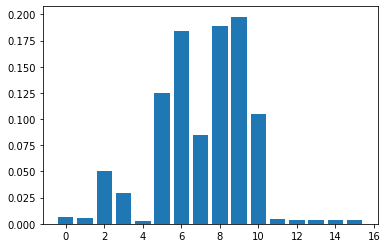

In [90]:
feature_list = list(X.columns)
feature_imp = {}

for i,v in enumerate(importance):
    feature_imp[feature_list[i]] = v
    print('Feature %d: %s, Score: %.5f' % (i, feature_list[i], v))
    
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [89]:
def sort_dict(x):
    return {k: v for k, v in sorted(x.items(), key=lambda item: item[1])}

sort_dict(feature_imp)

{'invited_by_user': 0.002782596921253813,
 'creation_source_PERSONAL_PROJECTS': 0.0032234057277942554,
 'creation_source_SIGNUP_GOOGLE_AUTH': 0.0036766602921398726,
 'creation_source_SIGNUP': 0.0039050585943255015,
 'creation_source_ORG_INVITE': 0.003991844190747195,
 'creation_source_GUEST_INVITE': 0.0044948728538398396,
 'enabled_for_marketing_drip': 0.00567741308632097,
 'opted_in_to_mailing_list': 0.006644973523085274,
 'invited_by_user_id': 0.029263995698183443,
 'org_id': 0.05065240931402022,
 'creation_day': 0.08464701988135855,
 'last_session_day': 0.10510906958924907,
 'creation_year': 0.12510595039272168,
 'creation_month': 0.1842057572816071,
 'last_session_year': 0.18889545660182722,
 'last_session_month': 0.19772351605152602}

<font color='green'>Looking at the feature importance scores, we see that last_session_creation_time and creation_time are the most important features. <br>
Org_id is another important feature.